*Created by Antoine Courbi and Cesar Delaygues*

# **A first model: LR**

***Import Tensorflow and Keras***

In [1]:
from tensorflow.keras import datasets

**Create train and test sets**

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

In [3]:
# print unique labels
import numpy as np
print(np.unique(train_labels))

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

[0 1 2 3 4 5 6 7 8 9]


### Display first three images

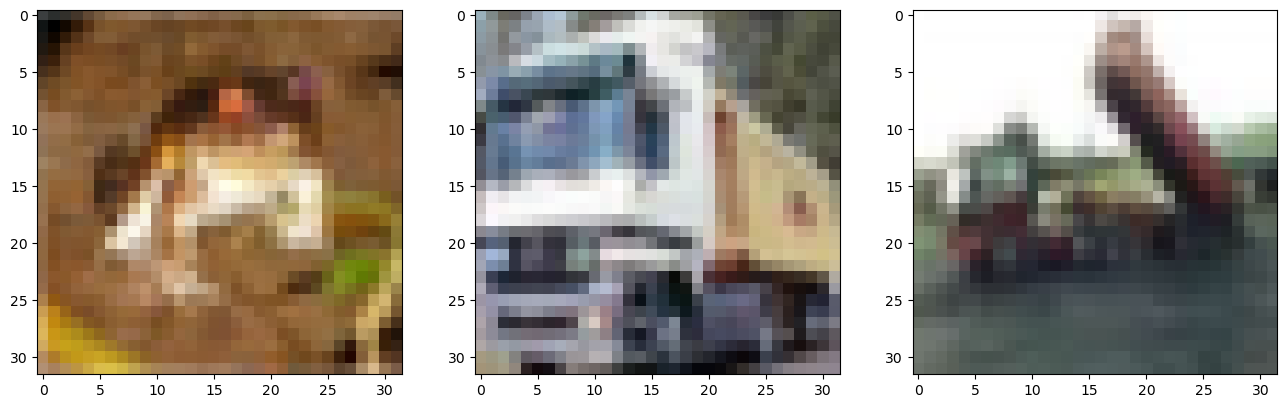

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 10))    
plt.subplot(131)
plt.imshow(train_images[0])
plt.subplot(132)
plt.imshow(train_images[1])
plt.subplot(133)
plt.imshow(train_images[2])

### Classify the data and evaluate the model

In [5]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=100)
model.fit(train_images.reshape(-1, 32*32*3), train_labels)

# evaluate the model knowing that it is a multi-class classification problem
from sklearn.metrics import accuracy_score, f1_score

preds = model.predict(test_images.reshape(-1, 32*32*3))
print(accuracy_score(test_labels, preds.round()))
print(f1_score(test_labels, preds.round(), average='macro'))

/Users/delaygues/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.4024
0.3983358258162466


/Users/delaygues/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Results

Results obtained with LR model were :  
```bash
Accuracy --> 0.4063
f1-score --> 0.4025157668663627
```

# **A first simple CNN**

We will follow the [tutorial](https://www.tensorflow.org/tutorials/images/cnn?hl=fr) to create a simple CNN

## 1 - Create the CNN model

### Import the librairies

In [6]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

### Download and prepare the data

In [7]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

### Verify the data

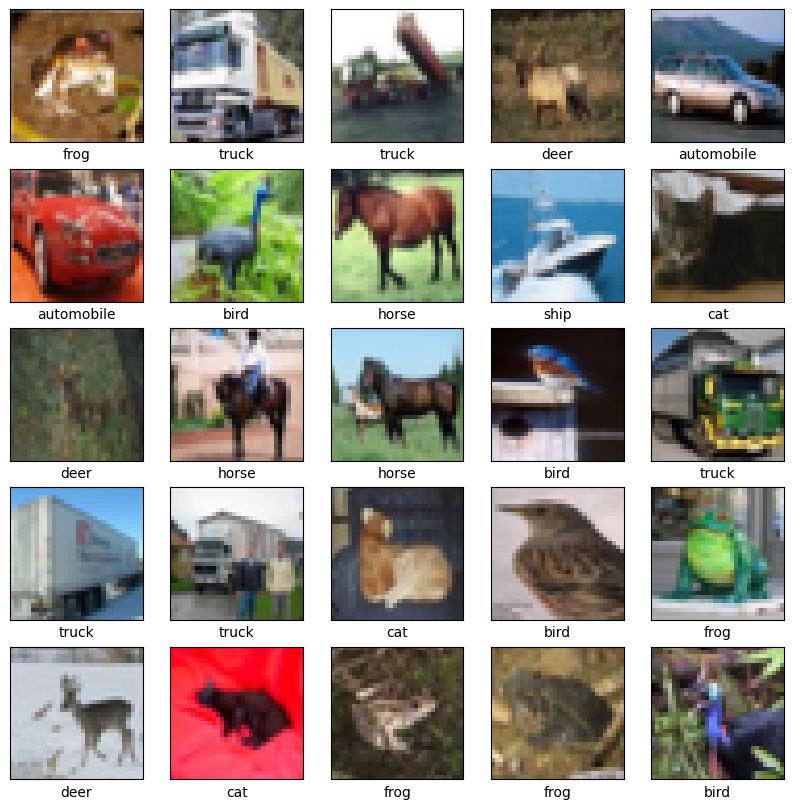

In [8]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

### Create the CNN model

In [9]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

2023-12-05 10:55:52.955965: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2 Pro
2023-12-05 10:55:52.956011: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2023-12-05 10:55:52.956022: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2023-12-05 10:55:52.956071: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-12-05 10:55:52.956091: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

### Compile and train the model

In [11]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10


2023-12-05 10:55:55.289859: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - 15s 8ms/step - loss: 1.5626 - accuracy: 0.4304 - val_loss: 1.3792 - val_accuracy: 0.5116
Epoch 2/10
1563/1563 [==============================] - 12s 8ms/step - loss: 1.2685 - accuracy: 0.5537 - val_loss: 1.1802 - val_accuracy: 0.5763
Epoch 3/10
1563/1563 [==============================] - 12s 8ms/step - loss: 1.2425 - accuracy: 0.5729 - val_loss: 1.4066 - val_accuracy: 0.5349
Epoch 4/10
1563/1563 [==============================] - 13s 8ms/step - loss: 1.4040 - accuracy: 0.5576 - val_loss: 1.4594 - val_accuracy: 0.5541
Epoch 5/10
1563/1563 [==============================] - 13s 8ms/step - loss: 2.3180 - accuracy: 0.5041 - val_loss: 2.8885 - val_accuracy: 0.5039
Epoch 6/10
1563/1563 [==============================] - 12s 8ms/step - loss: 5.9833 - accuracy: 0.4581 - val_loss: 13.5134 - val_accuracy: 0.4263
Epoch 7/10
1563/1563 [==============================] - 12s 8ms/step - loss: 19.4609 - accuracy: 0.4297 - val_loss: 34.7270 - val_accuracy: 

### Evaluate the model

313/313 - 1s - loss: 1890.2563 - accuracy: 0.2091 - 988ms/epoch - 3ms/step


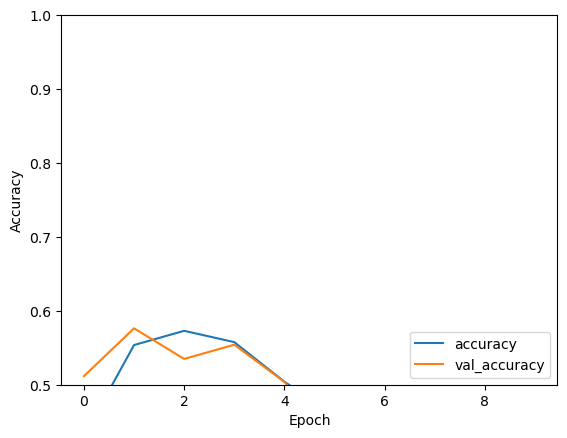

In [12]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [13]:
print(test_acc)

0.20910000801086426


### Results

The results obtained with the CNN model were :  
```bash
Accuracy --> 0.7113000154495239
```

## 2 - Compare LR and CNN results

For the recall :
```bash
On accuracy :
LR --> 0.4063
CNN --> 0.7113
```

Looking at the results, we can say that the CNN performs better than the LR model on the accuracy.

## 3 - Probability distribution

# Train a CNN to classify images in the CIFAR10 small images dataset

In [34]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [35]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping

lr_cb = ReduceLROnPlateau(monitor="loss", patience=10)
checkpoint = ModelCheckpoint('model.h5', save_best_only=True, monitor='val_accuracy', mode='max', verbose=1)
early_stopping_cb = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


In [36]:
history = model.fit(train_images, train_labels, epochs=20, 
                    validation_data=(test_images, test_labels), callbacks=[lr_cb, checkpoint, early_stopping_cb])

Epoch 1/20


/Users/delaygues/miniconda3/envs/tensorflow/lib/python3.10/site-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1563/1563 [==============================] - ETA: 0s - loss: 1.5067 - accuracy: 0.4621
Epoch 1: val_accuracy improved from -inf to 0.56200, saving model to model.h5
1563/1563 [==============================] - 12s 7ms/step - loss: 1.5067 - accuracy: 0.4621 - val_loss: 1.2531 - val_accuracy: 0.5620 - lr: 0.0010
Epoch 2/20
  25/1563 [..............................] - ETA: 9s - loss: 1.2947 - accuracy: 0.5625

/Users/delaygues/miniconda3/envs/tensorflow/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1561/1563 [============================>.] - ETA: 0s - loss: 1.1478 - accuracy: 0.6009
Epoch 2: val_accuracy improved from 0.56200 to 0.62670, saving model to model.h5
1563/1563 [==============================] - 11s 7ms/step - loss: 1.1476 - accuracy: 0.6010 - val_loss: 1.0824 - val_accuracy: 0.6267 - lr: 0.0010
Epoch 3/20
1557/1563 [============================>.] - ETA: 0s - loss: 1.0230 - accuracy: 0.6446
Epoch 3: val_accuracy improved from 0.62670 to 0.65160, saving model to model.h5
1563/1563 [==============================] - 11s 7ms/step - loss: 1.0231 - accuracy: 0.6446 - val_loss: 1.0316 - val_accuracy: 0.6516 - lr: 0.0010
Epoch 4/20
1563/1563 [==============================] - ETA: 0s - loss: 0.9468 - accuracy: 0.6742
Epoch 4: val_accuracy improved from 0.65160 to 0.66180, saving model to model.h5
1563/1563 [==============================] - 11s 7ms/step - loss: 0.9468 - accuracy: 0.6742 - val_loss: 0.9706 - val_accuracy: 0.6618 - lr: 0.0010
Epoch 5/20
1561/1563 [===========

In [ ]:
model.evaluate(test_images, test_labels)

# evaluate the model knowing that it is a multi-class classification problem
from sklearn.metrics import accuracy_score, f1_score

preds = model.predict(test_images)
print(accuracy_score(test_labels, preds.argmax(axis=1)))
print(f1_score(test_labels, preds.argmax(axis=1), average='macro'))

313/313 [==============================] - 0s 1ms/step
0.6378
0.6376537742274658
